<a href="https://colab.research.google.com/github/bpratik01/Computer-Vision-Notes-PyTorch-/blob/main/ADV_CV_ARCHITECTURES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ResNet (Residual Networks)**



## **1. The Need for ResNet**

### Challenges in Training Deep Neural Networks
- **Deeper networks** were hypothesized to learn better due to their ability to capture more complex features.
- However, in practice:
  - Increasing the number of layers leads to **degradation in performance** beyond a certain depth.
  - **Optimization challenges** arise, making deep networks difficult to train effectively.

### Key Problems in Deep Networks
1. **Degradation Problem**:
   - Adding more layers to an already deep network can reduce training and test accuracy.
   - This is not caused by overfitting but by optimization difficulties.
   - Layers in very deep networks fail to converge to optimal solutions.
   
2. **Vanishing Gradient Problem**:
   - Gradients become very small as they propagate backward in deep networks.
   - This prevents earlier layers from learning effectively, leading to **stalled training**.
   - Common in activation functions like sigmoid and tanh.

3. **Exploding Gradient Problem**:
   - In some cases, gradients grow excessively large during backpropagation, leading to instability and convergence issues.

---

## **2. Insights from the ResNet Research Paper**

### The "Plain Network" Observation
- The paper compared **plain networks** (deep networks without skip connections) with residual networks.
- Findings:
  - Deeper plain networks showed **lower training accuracy** than their shallower counterparts, even though they had more parameters.
  - This degradation was not due to overfitting but due to the inability of the network to optimize deeper architectures.

### Identity Mapping Challenge
- Deeper networks should ideally learn identity mappings (i.e., output = input) when additional layers do not provide improvements.
- In practice, learning these identity mappings is difficult for standard deep networks.

---

## **3. Residual Learning: The Key Proposal of ResNet**

### Core Idea
- ResNet introduces **residual connections** or **shortcut connections** to address optimization challenges in deep networks.
- Instead of learning the target function \(H(x)\), the residual block learns the **residual function** \(F(x) = H(x) - x\).
- Final output of the residual block:
  \[
  H(x) = F(x) + x
  \]

### Benefits of Residual Learning
1. **Easier Optimization**:
   - Learning residuals (differences) is simpler than learning the complete function.
   - The network can more easily approximate the identity function if required.

2. **Mitigation of Vanishing Gradients**:
   - Gradients flow directly through shortcut connections, preserving the signal strength.
   - This ensures effective backpropagation even in very deep networks.

3. **Allows Training of Deeper Networks**:
   - With residual blocks, ResNet successfully trains networks with over 100 layers (e.g., ResNet-152).
   - This contrasts with plain networks, where performance degrades significantly beyond 20-30 layers.

---

## **4. Key Features of ResNet Architecture**

### Residual Block
- Composed of:
  - Two or three convolutional layers.
  - A **skip connection** that directly adds the input to the output of the convolutional layers.
  - **Activation Function**: ReLU.
- Formula for output:
  \[
  y = F(x, \{W_i\}) + x
  \]

### Bottleneck Design (for Deeper Networks)
- Used in deeper versions like ResNet-50, ResNet-101, and ResNet-152.
- Reduces the number of parameters and computational cost:
  - A **1x1 convolution** compresses the feature map dimensions.
  - A **3x3 convolution** performs the primary operation.
  - Another **1x1 convolution** restores the original dimensions.

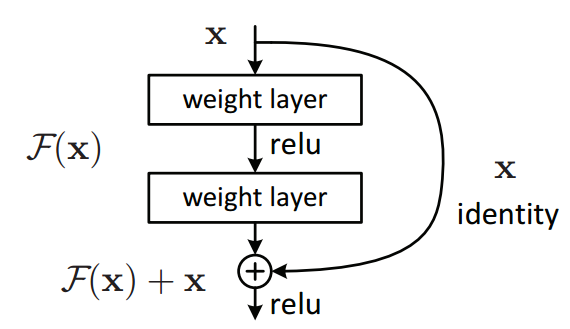
---


## **5. ResNet Variants and Applications**

### ResNet Variants
- **ResNet-18, ResNet-34**:
  - Use basic residual blocks.
- **ResNet-50, ResNet-101, ResNet-152**:
  - Use bottleneck blocks for deeper networks.

### Applications
- **Image Classification**:
  - State-of-the-art results on benchmarks like ImageNet.
- **Object Detection**:
  - ResNet-based backbones used in models like Faster R-CNN.
- **Transfer Learning**:
  - Pretrained ResNet models are widely used for transfer learning across diverse computer vision tasks.

---

## **7. Limitations of ResNet**
- **Computational Complexity**:
  - Deeper models like ResNet-152 are computationally expensive to train.
- **Shortcut Dependency**:
  - The success of ResNet heavily depends on the effectiveness of shortcut connections.
- **Redundancy in Deeper Layers**:
  - Some very deep layers may become redundant, as they primarily learn identity mappings.

---

## **Summary**
- ResNet was introduced to address the **degradation problem** and **vanishing gradients** in deep networks.
- By introducing **residual connections**, it enabled effective training of networks with over 100 layers.
- ResNet set a new benchmark for deep learning architectures, proving that **depth combined with optimization strategies** leads to improved performance.
- Its principles remain foundational in modern architectures, making it a cornerstone of deep learning research and practice.


## **Building and Fine Tuning Resnet34**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from tqdm import tqdm

### Data Preparation

In [ ]:
BATCH_SIZE = 64
EPOCHS = 15

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

In [ ]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

In [ ]:
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

### **Fine tuning the model**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

In [ ]:
model = models.resnet34(pretrained=False)

num_classes = len(train_data.classes)

model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
model.maxpool = nn.Identity()
model.fc = nn.Linear(model.fc.in_features, num_classes)

model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): Identity()
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)


In [ ]:
# Training Function
def train(epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch}")
    for batch_idx, (inputs, targets) in progress_bar:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        progress_bar.set_postfix({"Loss": f"{running_loss / (batch_idx + 1):.4f}", "Accuracy": f"{100. * correct / total:.2f}%"})

# Testing Function
def test():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in tqdm(test_loader, desc="Testing"):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    print(f"Test Accuracy: {100. * correct / total:.2f}%")


In [ ]:
for epoch in range(EPOCHS):
    train(epoch)
    test()
    scheduler.step()

Testing: 100%|██████████| 157/157 [00:06<00:00, 23.52it/s]


Test Accuracy: 35.96%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.61it/s]


Test Accuracy: 44.63%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.59it/s]


Test Accuracy: 63.29%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.58it/s]


Test Accuracy: 67.13%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.53it/s]


Test Accuracy: 69.72%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.58it/s]


Test Accuracy: 74.55%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.47it/s]


Test Accuracy: 78.10%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.44it/s]


Test Accuracy: 80.52%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.74it/s]


Test Accuracy: 79.21%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.78it/s]


Test Accuracy: 83.47%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.64it/s]


Test Accuracy: 84.05%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.79it/s]


Test Accuracy: 88.95%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.76it/s]


Test Accuracy: 90.09%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.09it/s]


Test Accuracy: 91.32%


Testing: 100%|██████████| 157/157 [00:06<00:00, 22.96it/s]

Test Accuracy: 92.02%


# Notes on Inception Nets (GoogLeNet)

## **1. What are Inception Nets?**
- **Definition**: Inception Nets are a family of Convolutional Neural Networks (CNNs) designed to improve both computational efficiency and accuracy by introducing the **Inception module**.
- **First Model**: Introduced as **GoogLeNet (Inception-v1)** in the 2014 ImageNet Challenge, where it achieved state-of-the-art performance.
- **Key Idea**: Instead of choosing the filter size or type of operation (convolution, pooling), all options are used simultaneously, and their outputs are concatenated.

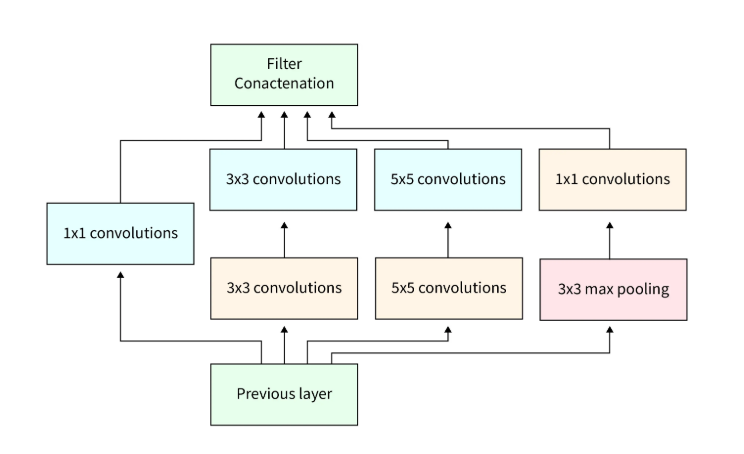
---

## **2. Why were Inception Nets Proposed?**
### Challenges Addressed:
1. **Computational Complexity**:
   - Deep networks require high computational resources.
   - Need for efficient architectures to reduce resource usage.
2. **Information Loss**:
   - Using a single convolution kernel may lose information.
   - Inception modules allow the network to capture information at multiple scales.
3. **Overfitting**:
   - Deep networks with large parameters are prone to overfitting.
   - Inception modules reduce parameter count while maintaining depth.

---

## **3. Architecture of Inception Nets**
### **GoogLeNet (Inception-v1) Architecture**
- **Key Features**:
  - 22 layers deep.
  - Reduced parameters significantly (~5 million vs. 60 million in AlexNet).
  - Replaced fully connected layers with global average pooling at the end.
- **Components**:
  1. **Inception Modules**:
     - A block combining convolutions with different filter sizes (1x1, 3x3, 5x5) and max-pooling.
     - Outputs of all operations are concatenated.
  2. **Auxiliary Classifiers**:
     - Intermediate softmax layers are added to combat vanishing gradients.
     - These also improve convergence during training.
  3. **Global Average Pooling**:
     - Replaces fully connected layers to reduce parameters and overfitting.

---

## **4. Inception Module Explained**

### Structure:
Each module consists of:
1. **1x1 Convolutions**:
   - Used for dimensionality reduction and computational efficiency.
2. **3x3 and 5x5 Convolutions**:
   - Extract features at different scales.
3. **Max Pooling**:
   - Captures spatial invariance.
4. **Concatenation**:
   - Combines the outputs of all operations.

### Example:
Input tensor size: \( h \times w \times d \)
- 1x1 Conv: Output \( h \times w \times d_1 \)
- 3x3 Conv: Output \( h \times w \times d_2 \)
- 5x5 Conv: Output \( h \times w \times d_3 \)
- Max Pooling: Output \( h \times w \times d_4 \)
- Final Output: Concatenated tensor \( h \times w \times (d_1 + d_2 + d_3 + d_4) \)

---

## **5. Variants of Inception Nets**
### **Inception-v2 and v3**:
- Introduced **factorized convolutions**:
  - Break down larger convolutions (e.g., 5x5) into smaller ones (e.g., two 3x3).
- Included **batch normalization** for faster convergence.
- Reduced computation further.

### **Inception-v4 and Inception-ResNet**:
- Combined Inception modules with **Residual Connections** from ResNet.
- Improved training speed and performance.

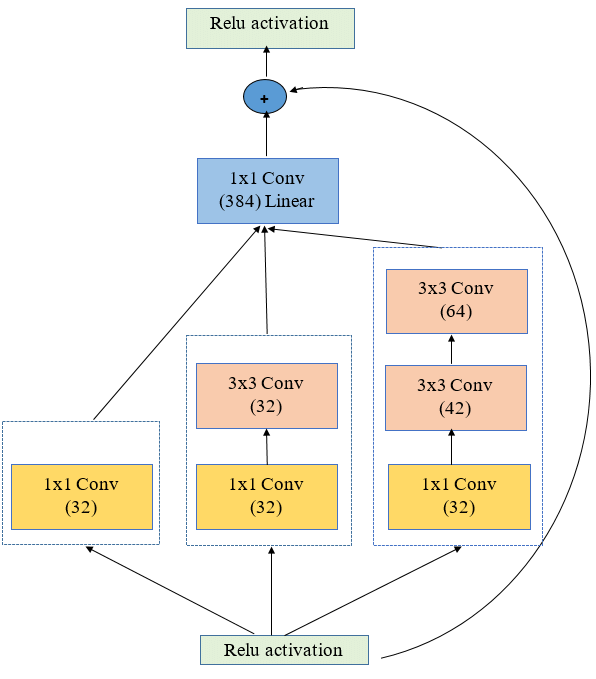

---

## **6. Computational Efficiency in Inception**

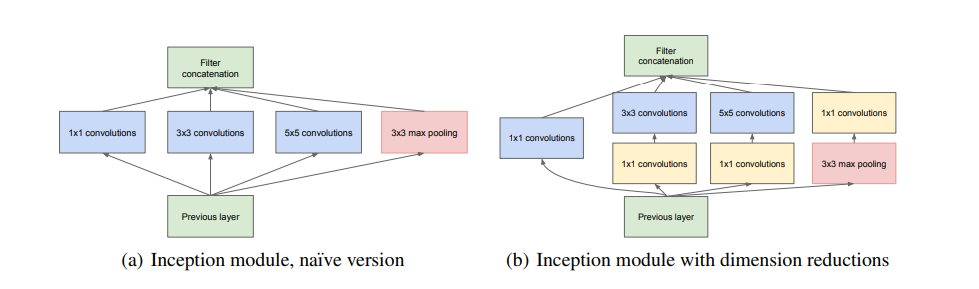

- **Parameter Reduction**:
  - Use of 1x1 convolutions for dimensionality reduction before expensive operations (3x3, 5x5).
- **Parallel Processing**:
  - Multiple operations in the module run in parallel, allowing multi-scale feature extraction efficiently.

---

## **7. Applications of Inception Nets**
1. **Image Classification**:
   - Dominated benchmarks like ImageNet and CIFAR.
2. **Object Detection**:
   - Forms the backbone of detection models like R-CNN variants.
3. **Feature Extraction**:
   - Pretrained models on Inception architectures are widely used for transfer learning.

---

## **8. Strengths of Inception Nets**
- **Efficiency**:
  - High accuracy with fewer parameters compared to AlexNet and VGG.
- **Flexibility**:
  - Modules can capture both fine-grained and coarse-grained features.
- **Scalability**:
  - Can be easily extended (e.g., Inception-ResNet).

---

## **9. Limitations**
- **Complexity in Design**:
  - Handcrafted module design may not generalize well to all tasks.
- **Optimization Challenges**:
  - Training deeper variants requires careful tuning (e.g., learning rate, regularization).

---

## **10. Summary**
- Inception Nets revolutionized CNN design by introducing **multi-scale feature extraction** in a computationally efficient manner.
- Their **modular architecture**, based on the Inception module, ensures scalability and flexibility.
- Variants like **Inception-v4** and **Inception-ResNet** continue to impact modern deep learning research and applications.


https://arxiv.org/pdf/1409.4842

### **Auxiliary Connections: Concept and Backpropagation Details**

#### **1. Concept of Auxiliary Connections**
- **Purpose**: Auxiliary connections provide intermediate supervision to deep networks by attaching small classifiers to intermediate layers. They:
  - Help mitigate **vanishing gradient problems**.
  - Improve feature learning at intermediate layers.
  - Act as regularizers to prevent overfitting.
  
- **Structure**: Each auxiliary connection consists of:
  - Global Average Pooling or Flattening of intermediate feature maps.
  - Fully Connected Layers to reduce dimensions.
  - A Softmax Layer for classification.
  
---

#### **2. Backpropagation in Auxiliary Connections**
- **Forward Pass**:
  - The input propagates through the main network and auxiliary classifiers in parallel.
  - Each auxiliary classifier computes its own **auxiliary loss** using the same ground truth labels as the main classifier.

- **Backward Pass**:
  - Gradients are calculated for:
    - The **auxiliary loss**, which flows backward from the auxiliary classifier to the intermediate layers.
    - The **main loss**, which flows backward from the final layer to all layers.
  - The gradients from the auxiliary losses and the main loss are combined to update shared weights in the earlier layers.

---
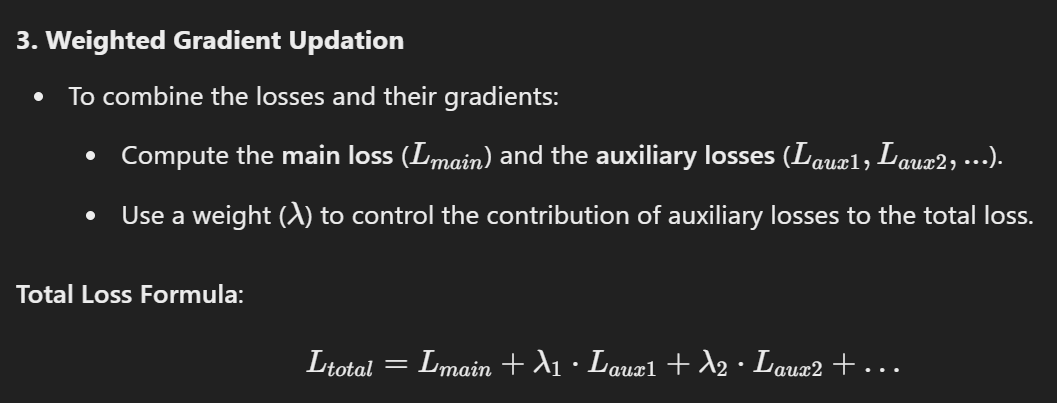
---

#### **4. Step-by-Step Backpropagation Process**
1. **Auxiliary Classifier Gradient Flow**:
   - Auxiliary losses backpropagate only to the layers connected to the corresponding auxiliary classifier.
   - These gradients are weighted and combined with the gradients from the main loss.

2. **Main Classifier Gradient Flow**:
   - The main loss propagates through all layers, contributing to the gradient of every shared parameter.

3. **Parameter Update**:
   - Shared parameters are updated based on the sum of gradients from both auxiliary and main losses.
   - Auxiliary classifier-specific parameters are updated only using the auxiliary loss gradients.

---


### **Comparison of Various Inception Models**

| **Aspect**                | **Inception v1**                                    | **Inception v2**                                         | **Inception v3**                                         | **Inception v4**                                         | **Inception-ResNet**                                    |
|---------------------------|----------------------------------------------------|--------------------------------------------------------|--------------------------------------------------------|--------------------------------------------------------|--------------------------------------------------------|
| **Year Introduced**       | 2014 (GoogLeNet)                                   | 2015                                                   | 2015                                                   | 2016                                                   | 2016                                                   |
| **Key Innovations**       | - Multi-scale convolutional filters. <br> - Auxiliary classifiers for regularization. | - Factorization of large filters (e.g., 7x7 into 1x7 and 7x1). <br> - Batch Normalization for faster convergence. | - Improved factorization (e.g., 3x3 into 3x1 and 1x3). <br> - Use of RMSProp optimizer. | - Extended architecture with deeper inception blocks. <br> - More parallel paths with varying filter sizes. | - Combines ResNet-style skip connections with Inception modules. <br> - Improves training stability for very deep networks. |
| **Number of Parameters**  | ~6.8M                                              | ~10.1M                                                 | ~23M                                                  | ~42M                                                  | ~55M                                                  |
| **Key Advantages**        | - Efficient multi-scale feature extraction. <br> - Reduced computation using 1x1 convolutions. | - Reduces computational complexity further via factorized convolutions. <br> - Stabilizes training with BatchNorm. | - More efficient feature extraction via refined factorization. <br> - Better accuracy and reduced training time. | - Enhanced capacity for large-scale problems. <br> - Higher accuracy than previous versions. | - Combines benefits of Inception and ResNet for extremely deep architectures. <br> - Excellent gradient flow and regularization. |
| **Regularization**        | Auxiliary classifiers for intermediate supervision. | Auxiliary classifiers for intermediate supervision.      | Auxiliary classifiers and RMSProp optimizer.           | Auxiliary classifiers and additional normalization.     | Auxiliary classifiers, skip connections for gradient flow. |
| **Computation Efficiency**| Moderate                                           | Higher than Inception v1                               | Balanced                                                | Reduced efficiency due to increased complexity.         | Slightly reduced efficiency compared to v4.            |
| **Accuracy Improvements** | Good improvement over AlexNet and VGG.             | Higher accuracy than Inception v1.                     | Better accuracy due to refined factorization.           | State-of-the-art accuracy in its time.                  | High accuracy, especially for very deep networks.       |
| **Use Cases**             | Early deep learning applications.                  | Tasks requiring more efficient deep models.            | Balanced tasks between efficiency and accuracy.         | High-performance tasks with abundant compute resources. | Ultra-deep architectures for advanced tasks.           |

---

#### **Key Takeaways**
- **Inception v1** introduced the idea of multi-scale feature extraction.  
- **Inception v2 and v3** focused on computational efficiency with factorization and BatchNorm.  
- **Inception v4** extended the architecture for higher capacity and accuracy.  
- **Inception-ResNet** combined Inception modules with residual connections for improved training stability and gradient flow in deeper networks.

In [1]:
!mkdir -p ./DATA

In [2]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 55% 33.0M/60.3M [00:00<00:00, 72.3MB/s]
100% 60.3M/60.3M [00:00<00:00, 99.1MB/s]


In [3]:
!unzip /content/fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
from tqdm import tqdm

In [18]:
EPOCHS = 15
BATCH_SIZE = 64
LEARNING_RATE = 0.01
WEIGHT_DECAY = 5e-4
MOMENTUM = 0.9

In [19]:
train_transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [20]:
test_tranform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [21]:
train_data = datasets.ImageFolder(root='/content/train', transform=train_transform)
test_data = datasets.ImageFolder(root='/content/test', transform=test_tranform)

In [22]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [23]:
def plot_images_from_dataloader(data_loader, grid_size=(4, 4)):
    """
    Plots a grid of images from a PyTorch DataLoader.

    Parameters:
        data_loader (DataLoader): A PyTorch DataLoader with images.
        grid_size (tuple): Grid dimensions (rows, columns), default is 4x4.
    """
    num_images = grid_size[0] * grid_size[1]

    # Get a batch of images
    data_iter = iter(data_loader)
    images, _ = next(data_iter)  # Ignore labels if they exist

    # Select the required number of images
    images = images[:num_images]

    # Plot the images
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(10, 10))
    axes = axes.flatten()

    for i, img in enumerate(images):
        # Convert tensor image to numpy format for plotting
        img = img.permute(1, 2, 0).numpy()  # Rearrange dimensions for matplotlib
        axes[i].imshow(img)
        axes[i].axis('off')

    # Hide unused axes
    for j in range(len(images), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


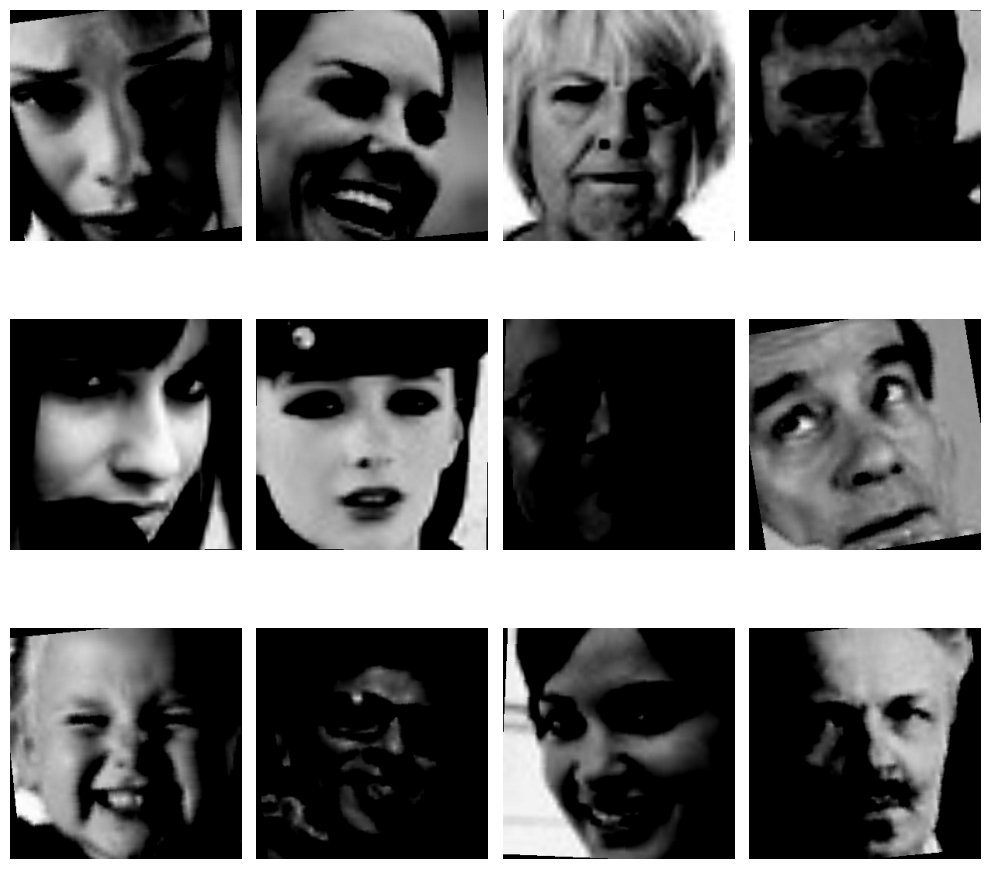

In [24]:
plot_images_from_dataloader(train_loader, grid_size=(3,4))

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

In [26]:
device

device(type='cuda')

In [27]:
model = models.inception_v3(pretrained=False, num_classes=7)

model.to(device)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

In [29]:
def train(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    pbar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {EPOCHS}")
    for batch_idx, (inputs, targets) in pbar:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        # Handle InceptionOutputs
        main_loss = criterion(outputs.logits, targets)
        aux_loss = criterion(outputs.aux_logits, targets)
        loss = main_loss + 0.4 * aux_loss  # Weight auxiliary loss

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.logits.max(1)  # Use main logits for accuracy
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        pbar.set_postfix({"Loss": f"{running_loss / (batch_idx + 1):.4f}",
                          "Accuracy": f"{100. * correct / total:.2f}%"})


def test():
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
    for inputs, targets in tqdm(test_loader, desc="Testing"):
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      _, predicted = outputs.max(1)
      total += targets.size(0)
      correct += predicted.eq(targets).sum().item()


    print(f"Test Accuracy: {100. * correct / total:.2f}%")

In [30]:
for epoch in range(EPOCHS):
  train(epoch)
  test()
  scheduler.step()

Testing: 100%|██████████| 113/113 [00:50<00:00,  2.23it/s]


Test Accuracy: 26.54%


Testing: 100%|██████████| 113/113 [00:50<00:00,  2.22it/s]


Test Accuracy: 33.25%


Testing: 100%|██████████| 113/113 [00:50<00:00,  2.23it/s]


Test Accuracy: 38.80%


Testing: 100%|██████████| 113/113 [00:51<00:00,  2.21it/s]


Test Accuracy: 40.92%


Testing: 100%|██████████| 113/113 [00:50<00:00,  2.23it/s]


Test Accuracy: 44.05%


Testing: 100%|██████████| 113/113 [00:50<00:00,  2.23it/s]


Test Accuracy: 48.76%


Testing: 100%|██████████| 113/113 [00:50<00:00,  2.23it/s]


Test Accuracy: 48.94%


Testing: 100%|██████████| 113/113 [00:50<00:00,  2.23it/s]


Test Accuracy: 50.46%


Testing: 100%|██████████| 113/113 [00:50<00:00,  2.22it/s]


Test Accuracy: 52.69%


Testing: 100%|██████████| 113/113 [00:50<00:00,  2.23it/s]


Test Accuracy: 54.63%


Testing: 100%|██████████| 113/113 [00:50<00:00,  2.23it/s]


Test Accuracy: 55.08%


Testing: 100%|██████████| 113/113 [00:50<00:00,  2.23it/s]


Test Accuracy: 56.21%


Testing: 100%|██████████| 113/113 [00:50<00:00,  2.24it/s]


Test Accuracy: 57.51%


Testing: 100%|██████████| 113/113 [00:50<00:00,  2.23it/s]


Test Accuracy: 57.56%


Testing: 100%|██████████| 113/113 [00:50<00:00,  2.23it/s]

Test Accuracy: 57.44%


### The performance can further be improved by training it for more epochs I'm out of compute so I am limiting my training here :)

In [33]:
from sklearn.metrics import classification_report

def evaluate_model(model, dataloader, device):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in tqdm(dataloader, desc="Evaluating"):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)  # Directly use model outputs
            _, predicted = outputs.max(1)  # Get the index of the max logit

            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    return all_targets, all_preds

# Generate classification report
targets, preds = evaluate_model(model, test_loader, device)

print("Classification Report:")
print(classification_report(targets, preds))


Evaluating: 100%|██████████| 113/113 [00:50<00:00,  2.22it/s]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.43      0.49       958
           1       1.00      0.04      0.07       111
           2       0.42      0.27      0.33      1024
           3       0.73      0.84      0.78      1774
           4       0.50      0.60      0.55      1233
           5       0.41      0.48      0.45      1247
           6       0.76      0.72      0.74       831

    accuracy                           0.57      7178
   macro avg       0.63      0.48      0.48      7178
weighted avg       0.58      0.57      0.56      7178

